#Titanic

In [1327]:
# mac475의 ipython 표준 style을 적용함
from IPython.core.display import HTML
styles = open("../styles/custom.css", "r").read()
HTML( styles )

##Description
In this challenge, we ask you to complete the analysis of
**what sorts of people were likely to survive.**
In particular, we ask you to **apply the tools of machine learning** **to predict which passengers survived the tragedy.**
- 즉, 어떤 종류의 승객이 살아남는지를 분석해야 한다.
- M.L을 적용해야 한다.
- 어떤 승객이 생존할 지 예측해야 한다.

##Evaluation

제시되는 dataset은 두 종류로 split되어있으며
- training set : 생존여부를 같이 제공한다. 모델링을 위해 사용한다.
- test set : prediction을 생성해야 한다.
이다.
test set에 대해서 생존여부를 예측해야 한다. (0 : 사망, 1 : 생존)
정확히 예측한 %가 점수로 부여된다.

##Submission Instructions

You should **submit a csv file** with exactly **418 entries plus a header row.**

This <font color='red'>**must have exactly 2 columns: PassengerId (which can be sorted in any order), and Survived</font>

which contains your binary predictions: 1 for survived, 0 for did not.**

- csv를 제출한다.
- csv에는 418개와 header row가 있어야 한다.
- 2개 column만 존재해야 한다. PassengerId, Survived (1 : 생존, 0 : 사망)
- 추가적 column 사용은 금지한다.

참고를 위해, gendermodel.csv를 참고한다.

##Competition Rules

###Submission Limits
**You may submit a maximum of 10 entries per day. (10회/일 가능)**

**You may select up to 5 final submissions for judging. (최종적으로 5개까지 선택가능함)**

###Competition Timeline
Start Date: 9/28/2012 9:13:33 PM UTC

Merger Deadline: None

First Submission Deadline: None

End Date: 12/31/2015 11:59:00 PM UTC

This is a fun competition aimed at helping you get started with machine learning.  While the Titanic dataset is publically
available on the internet, looking up the answers defeats the entire purpose.  So seriously, don't do that.

##dataset내의 변수관련 참고자료는 다음과 같다

|VARIABLE|DESCRIPTIONS
|:-|:-|:-:
|survival|Survival (0 = No; 1 = Yes)
|pclass|Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
|name|Name
|sex|Sex
|age|Age
|sibsp|Number of Siblings/Spouses Aboard
|parch|Number of Parents/Children Aboard
|ticket|Ticket Number
|fare|Passenger Fare
|cabin|Cabin (객실 정보, 객실 번호)
|embarked|Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic

Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)

Parent:   Mother or Father of Passenger Aboard Titanic

Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

In [1]:
# -*- coding: utf-8-*-
import pandas as pd
import numpy as np

# data를 확보한다.
df = pd.read_csv( './dataset/train.csv' )    # data를 읽어들인다.
df.head()    # 대략적 내용을 파악한다.

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


In [2]:
df.shape    # dataframe의 형태를 파악한다.

(891, 12)

In [3]:
df.count()    # 각 feature들의 data 현황을 파악한다.

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

대부분의 feature들은 문제없어 보이나, Age는 일부 누락, Cabin은 누락이 많아 보인다.

In [1331]:
df_age_isNaN = df[ df[ 'Age' ].isnull() ]    # Age가 NaN인 data를 별도로 확인한다. isnull()은 numeric의 경우 NaN을 찾을 수 있다.
df_age_is0 = df[ df[ 'Age' ] == 0 ]    # 혹시나, Age == 0를 찾아보니 없다.
print 'Age의 누락개수 : ', df_age_isNaN[ 'PassengerId' ].size
df_age_isNaN.head()

Age의 누락개수 :  177


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
19,20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
26,27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
28,29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q


In [4]:
df_cabin_isNone = df[ df[ 'Cabin' ].isnull() ]    # Cabin이 None인 data를 별도로 확인한다.
print 'Cabin의 누락개수 : ', df_cabin_isNone[ 'PassengerId' ].size    # Cabin은 누락이 상당히 많다.
df_cabin_isNone.head()

Cabin의 누락개수 :  687


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S


In [5]:
# 분석에 필요없어 보이는 Name, Ticket을 제거한다. NaN이 많은 Cabin을 제거한다.
df.drop( ['Name', 'Ticket', 'Cabin'], axis = 1, inplace = True )
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22,1,0,7.2500,S
1,2,1,1,female,38,1,0,71.2833,C
2,3,1,3,female,26,0,0,7.9250,S
3,4,1,1,female,35,1,0,53.1000,S
4,5,0,3,male,35,0,0,8.0500,S


In [6]:
df.count()    # 다시한번, dataset을 살펴본다.

PassengerId    891
Survived       891
Pclass         891
Sex            891
Age            714
SibSp          891
Parch          891
Fare           891
Embarked       889
dtype: int64

Embarked도 2건의 누락이 있다

In [8]:
df_embarked_isNone = df[ df[ 'Embarked' ].isnull() ]    # Embarked가 None인 것들
df_embarked_isNone

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
61,62,1,1,female,38,0,0,80,NaN
829,830,1,1,female,62,0,0,80,NaN


Embarked에서 누락이 발생한 대상은 제거하기로 한다. 즉, Trainig에서 제거됨. Learning 효과를 포기한다.

In [1336]:
print 'Embarked Filtering전 : ', df[ 'PassengerId' ].size
df = df[ df[ 'Embarked' ].notnull() ]
print 'Embarked Filtering후 : ', df[ 'PassengerId' ].size

Embarked Filtering전 :  891
Embarked Filtering후 :  889


In [1337]:
df.count()

PassengerId    889
Survived       889
Pclass         889
Sex            889
Age            712
SibSp          889
Parch          889
Fare           889
Embarked       889
dtype: int64

Age에 여전히 누락이 많다.
Age를 살펴본다.

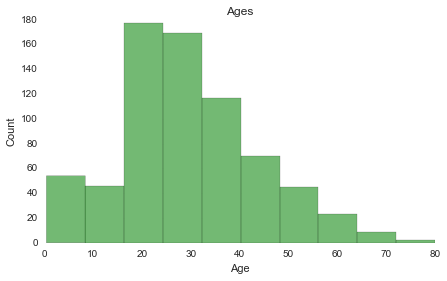

In [1338]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

alpha_val = 0.55

sz_age = df[ df[ 'Age' ].notnull() ][ 'Age' ]    # Age만 별도 추출
    
fig_age = plt.figure( figsize = (7,4) )    # fig size 정의
ax_age = plt.subplot2grid( (1,1), (0,0) )    # 표현 data
plt.hist( x = sz_age, normed = False, facecolor = 'green', alpha = alpha_val )    # hist 설정
plt.xlabel( 'Age' ); plt.ylabel( 'Count' ); plt.title( 'Ages' )

In [1339]:
print '최연소 : ', sz_age.min(), '\n최고령 : ', sz_age.max(), '\n평균연령 : ', sz_age.mean(), '\n중간연령 : ', sz_age.median()

최연소 :  0.42 
최고령 :  80.0 
평균연령 :  29.6420926966 
중간연령 :  28.0


20대, 30대에 많이 편중되어 있다. 일단, Age가 NaN인 대상들은 제거하기로 한다.

In [1340]:
# df = df[ df[ 'Age' ].notnull() ]    # Age가 None이 아닌것들만 Filtering한다.

df[ 'Age' ].fillna( value = df[ 'Age' ].mean(), inplace = True )
df.count()

PassengerId    889
Survived       889
Pclass         889
Sex            889
Age            889
SibSp          889
Parch          889
Fare           889
Embarked       889
dtype: int64

###여기까지 기본적인 Cleansing 작업을 진행했다.
###이제, 각 Feature 측면을 확인해본다.

Survived Alive :  340 Died :  549 Alive % :  0.382452193476
Class 1st :  214 2nd :  184 3rd :  491
Embarked Cherbourg :  168 Queenstown :  77 Southampton :  644
Sex male :  577 female :  312


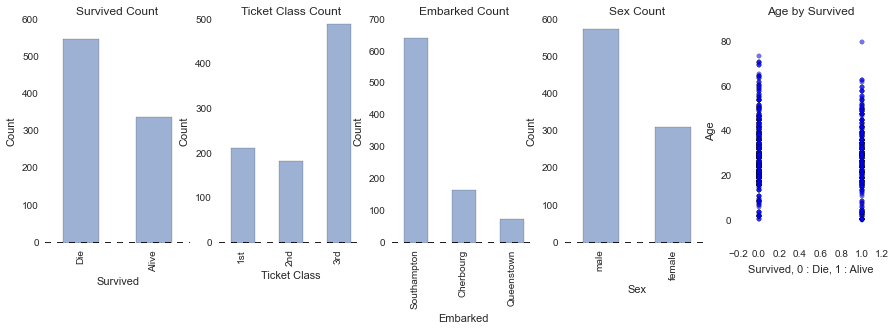

In [1341]:
fig_survived_summary = plt.figure( figsize = (15,4) )    # fig size 정의

# Surveved의 기본확인
sz_survived_summary = df[ 'Survived' ].value_counts()    # Survived의 생존여부별로 groupby하여 결과수치를 확인한다.
sz_survived_summary_tweaked = sz_survived_summary.rename( index = { 0 : 'Die', 1 : 'Alive' } )    # index를 가시적으로 변경
ax_survived_summary = plt.subplot2grid( (1,5), (0,0) )    # 표현 data의 위치
sz_survived_summary_tweaked.plot( kind = 'bar', ax = ax_survived_summary, alpha = alpha_val )
plt.xlabel( 'Survived' ); plt.ylabel( 'Count' ); plt.title( 'Survived Count' )
print 'Survived Alive : ', sz_survived_summary.ix[ 1 ], 'Died : ', sz_survived_summary.ix[ 0 ], 'Alive % : ', np.float( sz_survived_summary.ix[1] )/np.float( sz_survived_summary.sum() )

# P Class의 기본확인
sz_pclass_summary = df[ 'Pclass' ].value_counts()    # Pclass를 groupby하여 결과수치를 확인한다.
sz_pclass_summary.rename( index = { 1 : '1st', 2 : '2nd', 3 : '3rd' }, inplace = True )
ax_pclass_summary = plt.subplot2grid( (1,5), (0,1) )    # 표현 data의 위치
sz_pclass_summary.sort_index( ascending = True ).plot( kind = 'bar', ax = ax_pclass_summary, alpha = alpha_val )
plt.xlabel( 'Ticket Class' ); plt.ylabel( 'Count' ); plt.title( 'Ticket Class Count' )
print 'Class 1st : ', sz_pclass_summary.ix[ '1st' ], '2nd : ', sz_pclass_summary.ix[ '2nd' ], '3rd : ', sz_pclass_summary.ix[ '3rd' ]

# Embarked의 기본확인
sz_embarked_summary = df[ 'Embarked' ].value_counts()    # Embarked 정보별로 groupby하여 결과수치를 확인한다.
sz_embarked_summary.rename( index = { 'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton' }, inplace = True )
ax_embarked_summary = plt.subplot2grid( (1,5), (0,2) )    # 표현 data의 위치
sz_embarked_summary.plot( kind = 'bar', ax = ax_embarked_summary, alpha = alpha_val )
plt.xlabel( 'Embarked' ); plt.ylabel( 'Count' ); plt.title( 'Embarked Count' )
print 'Embarked Cherbourg : ', sz_embarked_summary.ix[ 'Cherbourg' ], 'Queenstown : ', sz_embarked_summary.ix[ 'Queenstown' ], 'Southampton : ', sz_embarked_summary.ix[ 'Southampton' ]

# Gender의 기본확인
sz_gender_summary = df[ 'Sex' ].value_counts()    # Sex 성별별로 groupby하여 결과수치를 확인한다.
ax_gender_summary = plt.subplot2grid( (1,5), (0,3) )    # 표현 data의 위치
sz_gender_summary.plot( kind = 'bar', ax = ax_gender_summary, alpha = alpha_val )
plt.xlabel( 'Sex' ); plt.ylabel( 'Count' ); plt.title( 'Sex Count' )
print 'Sex male : ', sz_gender_summary.ix[ 'male' ], 'female : ', sz_gender_summary.ix[ 'female' ]

# 연령대의 기본확인
sz_survived = df[ 'Survived' ]
sz_survived_tweaked = sz_survived.replace( to_replace = { 0 : 'Die', 1 : 'Alive' } )
sz_age = df[ 'Age' ]
ax_survived_summary = plt.subplot2grid( (1,5), (0,4) )    # 표현 data의 위치
plt.scatter( x = sz_survived, y = sz_age, alpha = alpha_val )
plt.xlabel( 'Survived, 0 : Die, 1 : Alive' ); plt.ylabel( 'Age' ); plt.title( 'Age by Survived' )

### 요약하면,
1. 생존자 < 사망자
2. 1등석, 2등석 << 3등석
3. Southhampton 사람들이 많았고
4. 남자 > 여자

뭐, 일단은 이 정도로...

In [1342]:
total_passengers = df[ 'PassengerId' ].size   # 전체 승객수
total_survived = df[ 'Survived' ].sum()    # 생존자수

df_male = df[ df[ 'Sex' ] == 'male' ]    # 남자
total_male = df_male[ 'PassengerId' ].size    # 남자의 수
df_male_survived = df_male[ df_male[ 'Survived' ] == 1 ]    # 남자 생존자
count_male_survived = df_male_survived[ 'PassengerId' ].size    # 남자 생존자수

df_female = df[ df[ 'Sex' ] == 'female' ]    # 여자
total_female = df_female[ 'PassengerId' ].size    # 여자의 수
df_female_survived = df_female[ df_female[ 'Survived' ] == 1 ]    # 여자 생존자
count_female_survived = df_female_survived[ 'PassengerId' ].size    # 여자 생존자수

In [1343]:
# print '승객수 : ', total_passengers, ', 생존자수 : ', total_survived, ', 생존율 : ',\
#       np.float( total_survived )/ np.float( total_passengers), '\n'\
#       '남자 : ', total_male, ', 남자 생존자수 : ', count_male_survived, ', 남자 생존율 : ',\
#       np.float( count_male_survived )/np.float( total_male ),'\n'\
#       '여자 : ', total_female, ', 여자 생존자수 : ', count_female_survived, ', 여자 생존율 : ',\
#       np.float( count_female_survived )/np.float( total_female )

##KDE

KDE에 대한 참고 ('http://darkpgmr.tistory.com/147')

KDE를 통해 어떤 해석을 얻어야 할까?

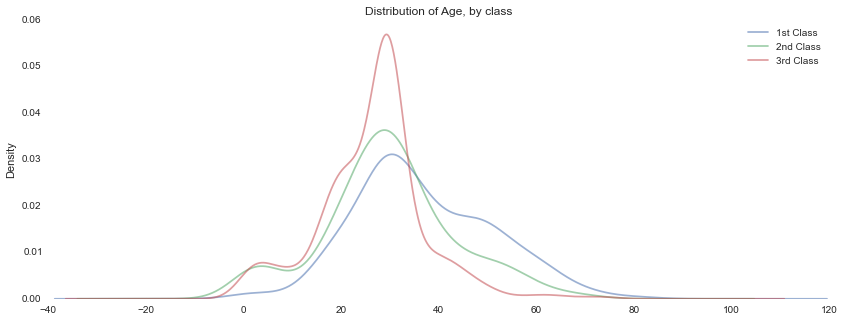

In [1344]:
fig_x = plt.figure( figsize = (14,5) )    # 전체 figure를 선언

ax_x = plt.subplot2grid( (1,1), (0,0) )    # plot을 grid에 제공한다
sz_age = df[ 'Age' ]    # 나이정보 Series
sz_age[ df[ 'Pclass' ] == 1 ].plot( kind = 'kde', alpha = alpha_val )    # 1등석인 승객들의 Age에 대한 KDE
sz_age[ df[ 'Pclass' ] == 2 ].plot( kind = 'kde', alpha = alpha_val )    # 2등석인 승객들의 Age에 대한 KDE
sz_age[ df[ 'Pclass' ] == 3 ].plot( kind = 'kde', alpha = alpha_val )    # 3등석인 승객들의 Age에 대한 KDE
plt.title( 'Distribution of Age, by class' )    # chart title을 생성한다
plt.legend( ('1st Class', '2nd Class', '3rd Class'), loc = 'best' )

##성별에 따른, 생존자수 분석

Died     468
Alive    109
dtype: int64
Alive    231
Died      81
dtype: int64


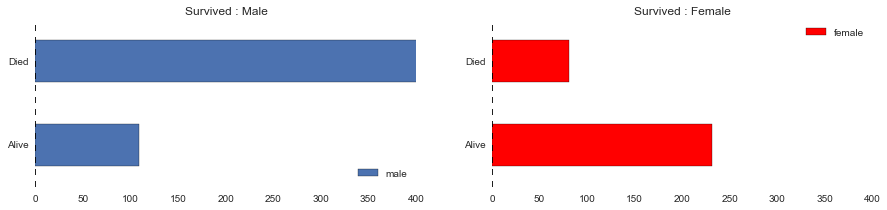

In [1345]:
# 남녀 생존자수를 기반으로 분석한다
fig_sur_by_gen = plt.figure( figsize = (15,3) )    # fig size 정의

# 남자
ax_sur_by_male = plt.subplot2grid( (1,2), (0,0) )    # 표현 data의 위치
sz_survived_male_summary = ( df[ 'Survived' ][ df[ 'Sex' ] == 'male' ] ).value_counts()    # 남자 생존여부 구분
sz_survived_male_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_survived_male_summary.sort_index( ascending = True ).plot( kind = 'barh', label = 'male', xlim = ([0,400]), ax = ax_sur_by_male )
plt.title( 'Survived : Male' ); plt.legend( loc = 'best' )
print sz_survived_male_summary

# 여자
ax_sur_by_female = plt.subplot2grid( (1,2), (0,1 ) )    # 표현 data의 위치
sz_survived_female_summary = ( df[ 'Survived' ][ df[ 'Sex' ] == 'female' ] ).value_counts()    # 여자 생존여부 구분
sz_survived_female_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_survived_female_summary.sort_index( ascending = True ).plot( kind = 'barh', color = 'red', label = 'female', xlim = ([0,400]), ax = ax_sur_by_female )
plt.title( 'Survived : Female' ); plt.legend( loc = 'best' )
print sz_survived_female_summary

##성별에 따른, 생존률 분석

Male Alive % :  0.188908145581
Female Alive % :  0.740384615385


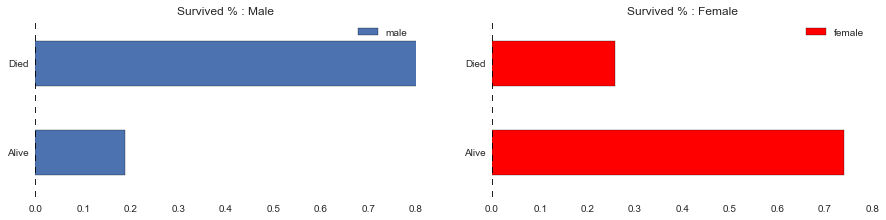

In [1346]:
# 남녀 각각의 생존률을 기반으로 분석한다
fig_sur_prop_by_gen = plt.figure( figsize = (15,7) )    # fig size 정의
# 남자
ax_sur_prop_by_male = plt.subplot2grid( (2,2), (1,0) )    # 표현 data의 위치
sz_survived_male_summary = ( df[ 'Survived' ][ df[ 'Sex' ] == 'male' ] ).value_counts()    # 남자 생존여부 구분
sz_survived_male_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
( sz_survived_male_summary/np.float( df_male[ 'PassengerId' ].size ) ).sort_index( ascending = True ).plot( kind = 'barh', label = 'male', xlim = ([0,0.8]), ax = ax_sur_prop_by_male )
plt.title( 'Survived % : Male' ); plt.legend( loc = 'best' )
print 'Male Alive % : ', ( sz_survived_male_summary/np.float( df_male[ 'PassengerId' ].size ) ).ix[ 'Alive' ]

# 여자
ax_sur_prop_by_female = plt.subplot2grid( (2,2), (1,1) )    # 표현 data의 위치
sz_survived_female_summary = ( df[ 'Survived' ][ df[ 'Sex' ] == 'female' ] ).value_counts()    # 여자 생존여부 구분
sz_survived_female_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
( sz_survived_female_summary/np.float( df_female[ 'PassengerId' ].size ) ).sort_index( ascending = True ).plot( kind = 'barh', label = 'female', xlim = ([0,0.8]), ax = ax_sur_prop_by_female, color = 'red' )
plt.title( 'Survived % : Female' ); plt.legend( loc = 'best' )
print 'Female Alive % : ', ( sz_survived_female_summary/np.float( df_female[ 'PassengerId' ].size ) ).ix[ 'Alive' ]

* 요약하면,
* 남자들의 경우, 생존자 << 사망자
* 여자들의 경우, 생존자 >> 사망자

임을 알 수 있다.

**<font color = 'red'>즉, 성별은 생존률과 관련성이 있음을 알 수 있다. 여자는 생존가능성이 높다</font>**

##좌석등급에 따른, 생존률 분석

Alive    134
Died      80
dtype: int64
Died     97
Alive    87
dtype: int64
Died     372
Alive    119
dtype: int64


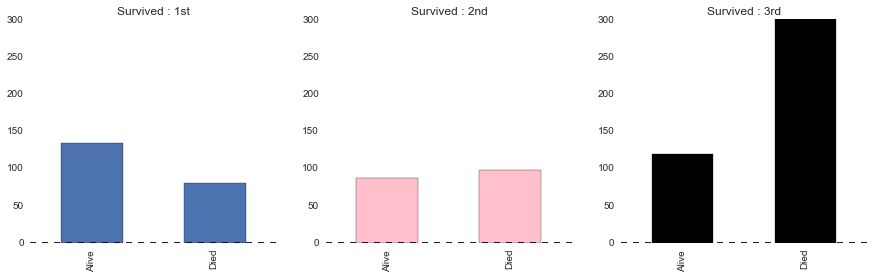

In [1347]:
# 좌석등급 생존자수를 기반으로 분석한다
fig_sur_by_pclass = plt.figure( figsize = (15,4) )    # fig size 정의

# 1등급
sz_survived_pclass1_summary = ( df[ 'Survived' ][ df[ 'Pclass' ] == 1 ] ).value_counts()    # 1등급 좌석 생존 요약
ax_sur_by_class1 = plt.subplot2grid( (1,3), (0,0) )    # 표현 data의 위치
sz_survived_pclass1_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_survived_pclass1_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '1st', ylim = ([0,300]), ax = ax_sur_by_class1 )
plt.title( 'Survived : 1st' )
print sz_survived_pclass1_summary

# 2등급
sz_survived_pclass2_summary = ( df[ 'Survived' ][ df[ 'Pclass' ] == 2 ] ).value_counts()    # 2등급 좌석 생존 요약
ax_sur_by_class2 = plt.subplot2grid( (1,3), (0,1) )    # 표현 data의 위치
sz_survived_pclass2_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_survived_pclass2_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '2nd', ylim = ([0,300]), ax = ax_sur_by_class2, color = 'pink' )
plt.title( 'Survived : 2nd' )
print sz_survived_pclass2_summary

# 3등급
sz_survived_pclass3_summary = ( df[ 'Survived' ][ df[ 'Pclass' ] == 3 ] ).value_counts()    # 2등급 좌석 생존 요약
ax_sur_by_class3 = plt.subplot2grid( (1,3), (0,2) )    # 표현 data의 위치
sz_survived_pclass3_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_survived_pclass3_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '1st', ylim = ([0,300]), ax = ax_sur_by_class3, color = 'black' )
plt.title( 'Survived : 3rd' )
print sz_survived_pclass3_summary

* 1등석은 생존자 > 사망자, 2등석은 비슷하고, 3등석은 사망자 >> 생존자이다.

**<font color='red'>즉, 3등석은 사망확률이 높다</font>**

1st Alive % :  0.626168224299
2nd Alive % :  0.472826086957
3rd Alive % :  0.242362525458


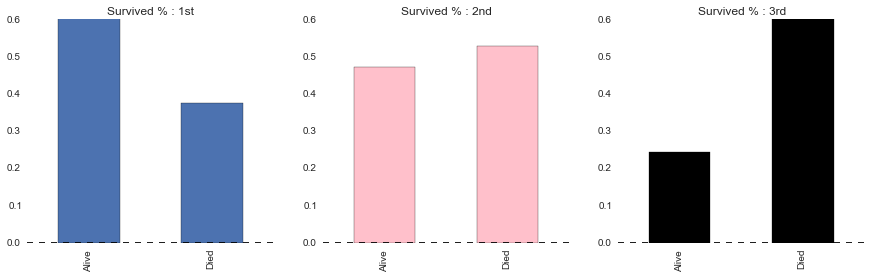

In [1348]:
# 좌석등급 각각의 생존률을 기반으로 분석한다
fig_sur_prop_by_pclass = plt.figure( figsize = (15,4) )    # fig size 정의

# 1등급
sz_sur_pclass1 = df[ 'Survived' ][ df[ 'Pclass' ] == 1 ]    # 1등급 Series raw data
sz_sur_prop_pclass1_summary = sz_sur_pclass1.value_counts()/( np.float( sz_sur_pclass1.size ) ) # groupby후 %
ax_sur_prop_by_class1 = plt.subplot2grid( (1,3), (0,0) )    # 표현 data의 위치
sz_sur_prop_pclass1_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_sur_prop_pclass1_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '1st', ylim = ([0,0.6]), ax = ax_sur_prop_by_class1 )
plt.title( 'Survived % : 1st' )
print '1st Alive % : ', sz_sur_prop_pclass1_summary.ix[ 'Alive' ]

# 2등급
sz_sur_pclass2 = df[ 'Survived' ][ df[ 'Pclass' ] == 2 ]    # 2등급 Series raw data
sz_sur_prop_pclass2_summary = sz_sur_pclass2.value_counts()/( np.float( sz_sur_pclass2.size ) ) # groupby후 %
ax_sur_prop_by_class2 = plt.subplot2grid( (1,3), (0,1) )    # 표현 data의 위치
sz_sur_prop_pclass2_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_sur_prop_pclass2_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '2nd', ylim = ([0,0.6]), ax = ax_sur_prop_by_class2, color = 'pink' )
plt.title( 'Survived % : 2nd' )
print '2nd Alive % : ', sz_sur_prop_pclass2_summary.ix[ 'Alive' ]

# # 3등급
sz_sur_pclass3 = df[ 'Survived' ][ df[ 'Pclass' ] == 3 ]    # 3등급 Series raw data
sz_sur_prop_pclass3_summary = sz_sur_pclass3.value_counts()/( np.float( sz_sur_pclass3.size ) ) # groupby후 %
ax_sur_prop_by_class3 = plt.subplot2grid( (1,3), (0,2) )    # 표현 data의 위치
sz_sur_prop_pclass3_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_sur_prop_pclass3_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '3rd', ylim = ([0,0.6]), ax = ax_sur_prop_by_class3, color = 'black' )
plt.title( 'Survived % : 3rd' )
print '3rd Alive % : ', sz_sur_prop_pclass3_summary.ix[ 'Alive' ]

* 1등석은 생존자 > 사망자, 2등석은 비슷하고, 3등석은 사망자 >> 생존자이다.

**<font color='red'>즉, 3등석은 사망확률이 높다</font>**

**<font color='red'>그리고, 1등석은 생존확률이 높다</font>**

###여기까지 정리하면, 여자 w/ 1등석 >>> 남자 w/ 3등석의 형태로 생존확률은 높아질 것이다.

1st Female :  0.967391304348
1st Male :  0.368852459016
2nd Female :  0.921052631579
2nd Male :  0.157407407407
3rd Female :  0.5
3rd Male :  0.135446685879


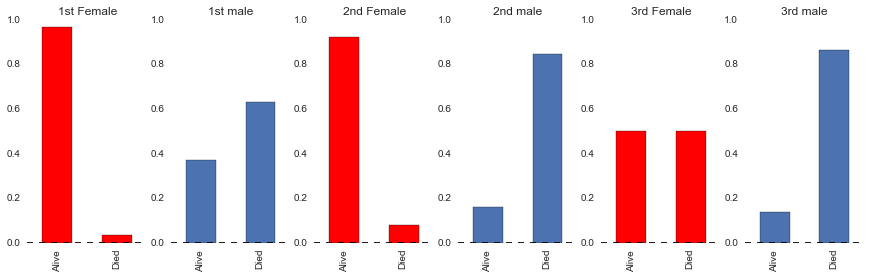

In [1349]:
# 좌석등급별 성별따른 각각의 생존률을 기반으로 분석한다
fig_pclass1 = plt.figure( figsize = (15,4) )    # fig size 정의

# 1등급, 여자
sz_pclass1_f = df[ 'Survived' ][ ( df[ 'Pclass' ] == 1 ) & ( df[ 'Sex' ] == 'female' ) ]    # 1등급, 여자
sz_pclass1_f_summary = sz_pclass1_f.value_counts()/( np.float( sz_pclass1_f.size ) )    # groupby후 %
sz_pclass1_f_summary
ax_pclass1_f = plt.subplot2grid( (1,6), (0,0) )    # 표현 data의 위치
sz_pclass1_f_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_pclass1_f_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '1st w/ female', ylim = ([0,1]), ax = ax_pclass1_f, color = 'red' )
plt.title( '1st Female' )
print '1st Female : ', sz_pclass1_f_summary.ix[ 'Alive' ]

# 1등급, 남자
sz_pclass1_m = df[ 'Survived' ][ ( df[ 'Pclass' ] == 1 ) & ( df[ 'Sex' ] == 'male' ) ]    # 1등급, 남자
sz_pclass1_m_summary = sz_pclass1_m.value_counts()/( np.float( sz_pclass1_m.size ) )    # groupby후 %
ax_pclass1_m = plt.subplot2grid( (1,6), (0,1) )    # 표현 data의 위치
sz_pclass1_m_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_pclass1_m_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '1st w/ male', ylim = ([0,1]), ax = ax_pclass1_m )
plt.title( '1st male' )
print '1st Male : ', sz_pclass1_m_summary.ix[ 'Alive' ]

# 2등급, 여자
sz_pclass2_f = df[ 'Survived' ][ ( df[ 'Pclass' ] == 2 ) & ( df[ 'Sex' ] == 'female' ) ]    # 2등급, 여자
sz_pclass2_f_summary = sz_pclass2_f.value_counts()/( np.float( sz_pclass2_f.size ) )    # groupby후 %
sz_pclass2_f_summary
sz_pclass2_f = plt.subplot2grid( (1,6), (0,2) )    # 표현 data의 위치
sz_pclass2_f_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_pclass2_f_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '2nd w/ female', ylim = ([0,1]), ax = sz_pclass2_f, color = 'red' )
plt.title( '2nd Female' )
print '2nd Female : ', sz_pclass2_f_summary.ix[ 'Alive' ]

# 2등급, 남자
sz_pclass2_m = df[ 'Survived' ][ ( df[ 'Pclass' ] == 2 ) & ( df[ 'Sex' ] == 'male' ) ]    # 2등급, 남자
sz_pclass2_m_summary = sz_pclass2_m.value_counts()/( np.float( sz_pclass2_m.size ) )    # groupby후 %
ax_pclass2_m = plt.subplot2grid( (1,6), (0,3) )    # 표현 data의 위치
sz_pclass2_m_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_pclass2_m_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '2nd w/ male', ylim = ([0,1]), ax = ax_pclass2_m )
plt.title( '2nd male' )
print '2nd Male : ', sz_pclass2_m_summary.ix[ 'Alive' ]

# 3등급, 여자
sz_pclass3_f = df[ 'Survived' ][ ( df[ 'Pclass' ] == 3 ) & ( df[ 'Sex' ] == 'female' ) ]    # 3등급, 여자
sz_pclass3_f_summary = sz_pclass3_f.value_counts()/( np.float( sz_pclass3_f.size ) )    # groupby후 %
sz_pclass3_f_summary
sz_pclass3_f = plt.subplot2grid( (1,6), (0,4) )    # 표현 data의 위치
sz_pclass3_f_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_pclass3_f_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '3rd w/ female', ylim = ([0,1]), ax = sz_pclass3_f, color = 'red' )
plt.title( '3rd Female' )
print '3rd Female : ', sz_pclass3_f_summary.ix[ 'Alive' ]

# 3등급, 남자
sz_pclass3_m = df[ 'Survived' ][ ( df[ 'Pclass' ] == 3 ) & ( df[ 'Sex' ] == 'male' ) ]    # 3등급, 남자
sz_pclass3_m_summary = sz_pclass3_m.value_counts()/( np.float( sz_pclass3_m.size ) )    # groupby후 %
ax_pclass3_m = plt.subplot2grid( (1,6), (0,5) )    # 표현 data의 위치
sz_pclass3_m_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_pclass3_m_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '2nd w/ male', ylim = ([0,1]), ax = ax_pclass3_m )
plt.title( '3rd male' )
print '3rd Male : ', sz_pclass3_m_summary.ix[ 'Alive' ]

- <font color = 'blue'>정리하면, 생존률은</font>
- <font color = 'blue'>1등석 여성, 2등석 여성, 3등석 여성, 1등석 남성, 2/3등석 남성순이다.</font>

- <font color = 'red'>마찬가지로, 사망률은</font>
- <font color = 'red'>2/3등석 남성, 1등석 남성, 3등석 여성, 2등석 여성, 1등석 여성순이다.</font>

##이러한 기본적 이해를 바탕으로 Prediction 진행

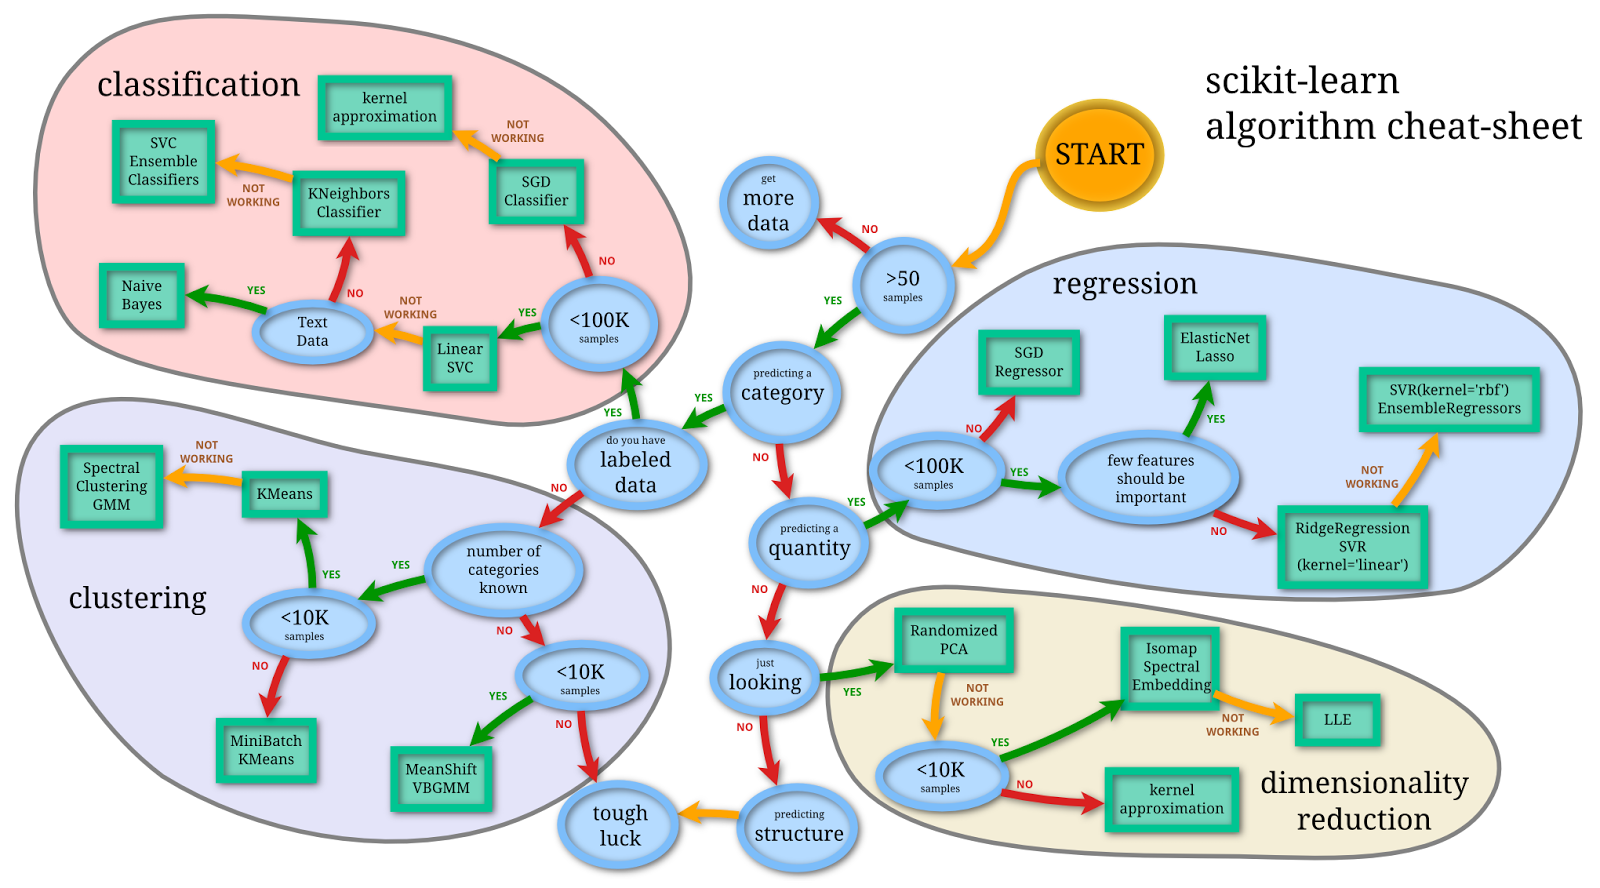

In [1350]:
from IPython.display import Image
Image( filename = './images/sklearn.ml.map.png', width = 1000, height = 550 )
# Image?

- 위를 보면, 일단은 Titanic은 Classification 계열의 문제정의이며, LinearSVC로 수행가능할 것으로 보인다
- 이후, KNN 및 Ensemble 계열의 Classification (즉, RandomForest)를 적용가능하다
- PCA 진행여부도 판단할 것

In [1351]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22,1,0,7.2500,S
1,2,1,1,female,38,1,0,71.2833,C
2,3,1,3,female,26,0,0,7.9250,S
3,4,1,1,female,35,1,0,53.1000,S
4,5,0,3,male,35,0,0,8.0500,S


In [1352]:
df.shape

(889, 9)

주어진 Dataset의 feature들을 보면,

1. PassengerId, Survived, Pclass, Age, SibSp, Parch, Fare는 numeric

2. Sex, Embarked는 string

Prediction 진행을 위해서는 Sex, Embarked와 같은 categorical string을 numeric으로 변환해야 한다.

In [1353]:
from sklearn import preprocessing

# Sex : 성별정보 변경
le_sex = preprocessing.LabelEncoder()    # Sex 정보를 위한, label Encoder 생성
df[ 'Sex' ] = le_sex.fit_transform( df[ 'Sex' ] )    # le를 fit/ transforming
# df[ 'Sex' ] = le_embarked.inverse_transform( df[ 'Sex' ] )    # 이후에, 원상태 복귀를 위한 code

# Embarked : 승선지정보 변경
le_embarked = preprocessing.LabelEncoder()    # Embarked 정보를 위한, Label Encoder 생성
df[ 'Embarked' ] = le_embarked.fit_transform( df[ 'Embarked' ] )    # le를 fit/ transforming
# df[ 'Embarked' ] = le_embarked.inverse_transform( df[ 'Embarked' ] )    # 이후에, 원상태 복귀를 위한 code

df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22,1,0,7.2500,2
1,2,1,1,0,38,1,0,71.2833,0
2,3,1,3,0,26,0,0,7.9250,2
3,4,1,1,0,35,1,0,53.1000,2
4,5,0,3,1,35,0,0,8.0500,2


Prediction 진행시, PassenderId는 의미가 없으므로 제거한다

In [1354]:
df.drop( 'PassengerId', axis = 1, inplace = True )    # PassengerId feature를 drop
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2


- Dataframe을 Data와 Target으로 분리한다.
- Target인 y는 생존여부를 의미하는 Survived
- Data인 X는 생존여부 y를 결정하는 다양한 features인 Pclass, Sex, Age, SibSp, Parch, Fare, Embarked

##Test dataset을 가지고 Cleansing후 prediction을 수행한다.
###Test dataset을 확보

In [1355]:
# data를 확보한다.
df_test = pd.read_csv( './dataset/test.csv' )    # data를 읽어들인다.
df_test.head()    # 대략적 내용을 파악한다.

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


###의미없는 Feature를 제거

In [1356]:
df_test.head( 1 )

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q


In [1357]:
sz_passender_id = df_test[ 'PassengerId' ]    # 답안제출 제공형식에는 PassenderId별 Survived가 제공되어야 하므로, 이를 백업

# df_test.drop( [ 'PassengerId', 'Name', 'Ticket', 'Cabin', 'Fare', 'Embarked' ], axis = 1, inplace = True )
df_test.drop( [ 'PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch', 'Cabin' ], axis = 1, inplace = True )
df_test.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,male,34.5,7.8292,Q
1,3,female,47.0,7.0000,S
2,2,male,62.0,9.6875,Q
3,3,male,27.0,8.6625,S
4,3,female,22.0,12.2875,S


###Categorical data의 Label Encoding 수행

In [1358]:
# Sex : 성별정보 변경
le_sex = preprocessing.LabelEncoder()    # Sex 정보를 위한, label Encoder 생성
df_test[ 'Sex' ] = le_sex.fit_transform( df_test[ 'Sex' ] )    # le를 fit/ transforming
# df_test[ 'Sex' ] = le_embarked.inverse_transform( df_test[ 'Sex' ] )    # 이후에, 원상태 복귀를 위한 code

# Embarked : 승선지정보 변경
# le_embarked = preprocessing.LabelEncoder()    # Embarked 정보를 위한, Label Encoder 생성
# df_test[ 'Embarked' ] = le_embarked.fit_transform( df_test[ 'Embarked' ] )    # le를 fit/ transforming
# df_test[ 'Embarked' ] = le_embarked.inverse_transform( df_test[ 'Embarked' ] )    # 이후에, 원상태 복귀를 위한 code

df_test.head()

,Pclass,Sex,Age,Fare,Embarked
0,3,1,34.5,7.8292,Q
1,3,0,47.0,7.0000,S
2,2,1,62.0,9.6875,Q
3,3,1,27.0,8.6625,S
4,3,0,22.0,12.2875,S


In [1359]:
# None, NaN 존재여부를 Check한다.
df_test.count()

Pclass      418
Sex         418
Age         332
Fare        417
Embarked    418
dtype: int64

<font color = 'red'>**누락값을 항상 채워둔다**</font>

Age, Fare에 누락이 있으므로, 이를 처리해야 한다.
Fare는 1개 누락이므로, Fare 누락값을 처리하기 위해 Training data를 통해 추정.
먼저, Pclass와 Fare는 서로 상관관계가 있을까 확인한다.

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22,1,0,7.2500,2
1,1,1,0,38,1,0,71.2833,0
2,1,3,0,26,0,0,7.9250,2
3,1,1,0,35,1,0,53.1000,2
4,0,3,1,35,0,0,8.0500,2


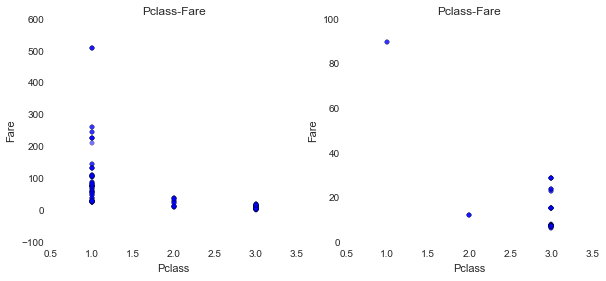

In [1360]:
fig_pclass_n_fare = plt.figure( figsize = (15,4) )    # fig size 정의

sz_pclass = df[ 'Pclass' ][ df[ 'Embarked' ] == 0 ]
sz_fare = df[ 'Fare' ][ df[ 'Embarked' ] == 0 ]
ax_pclass_n_fare = plt.subplot2grid( (1,3), (0,0) )    # 표현 data의 위치
plt.scatter( x = sz_pclass, y = sz_fare, alpha = alpha_val )
plt.xlabel( 'Pclass' ); plt.ylabel( 'Fare' ); plt.title( 'Pclass-Fare' )

sz_pclass = df[ 'Pclass' ][ df[ 'Embarked' ] == 1 ]
sz_fare = df[ 'Fare' ][ df[ 'Embarked' ] == 1 ]
ax_pclass_n_fare = plt.subplot2grid( (1,3), (0,1) )    # 표현 data의 위치
plt.scatter( x = sz_pclass, y = sz_fare, alpha = alpha_val )
plt.xlabel( 'Pclass' ); plt.ylabel( 'Fare' ); plt.title( 'Pclass-Fare' )

# sz_pclass = df[ 'Pclass' ][ df[ 'Embarked' ] == 2 ]
# sz_fare = df[ 'Fare' ][ df[ 'Embarked' ] == 2 ]
# ax_pclass_n_fare = plt.subplot2grid( (1,3), (0,2) )    # 표현 data의 위치
# plt.scatter( x = sz_pclass, y = sz_fare, alpha = alpha_val )
# plt.xlabel( 'Pclass' ); plt.ylabel( 'Fare' ); plt.title( 'Pclass-Fare' )
df.head()

* 정확히는 모르겠으나, 1등급은 2등급, 3등급에 비해 가격대가 비싸다. test data중에 Fare가 누락된 data를 확인하면,

In [1361]:
# df_test[ df_test[ 'Fare' ].isnull() ]

* Embarked = 2, Pclass = 3인 것을 알 수 있으므로, trainig data중 Embarked = 2의 fare mean 평균값을 활용하여 채워넣고자 한다.

In [1362]:
# fare_by_training = df[ 'Fare' ][ df[ 'Embarked' ] == 2 ].mean()
# df_test[ 'Fare' ].fillna( value = fare_by_training, inplace = True )
# df_test.count()

* 1건의 Fare 누락분은 채워넣었고, Age를 처리해야 한다. 추측컨데, 좌석등급 혹은 Embarked와 관련성 있는지 확인해본다.

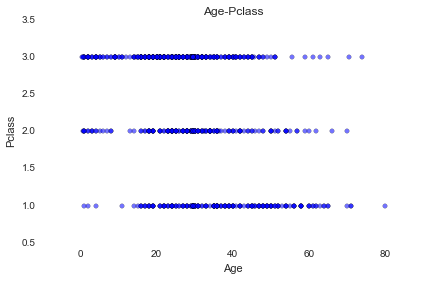

In [1363]:
# df_test[ df_test[ 'Age' ].isnull() ]
fig_pclass_n_age = plt.figure( figsize = (15,4) )    # fig size 정의

ax_pclass_n_age = plt.subplot2grid( (1,2), (0,0) )    # 표현 data의 위치
plt.scatter( x = df[ 'Age' ], y = df[ 'Pclass' ], alpha = alpha_val )
plt.xlabel( 'Age' ); plt.ylabel( 'Pclass' ); plt.title( 'Age-Pclass' )

# ax_pclass_n_age = plt.subplot2grid( (1,2), (0,1) )    # 표현 data의 위치
# plt.scatter( x = df[ 'Age' ], y = df[ 'Embarked' ], alpha = alpha_val )
# plt.xlabel( 'Age' ); plt.ylabel( 'Embarked' ); plt.title( 'Age-Embarked' )

* 단언은 곤란하나, 연령대가 높아짐에 따라 좌석등급은 높아지는 정도가 확인된다. 하지만, 60대 3등급은 희박하고, 10대 1등급도 희박하다.
* 하지만, 각 좌석등급별 평균나이를 채우려면 귀찮으니, 전체 평균을 누락된 Age에 채우도록 한다.

In [1364]:
age_by_trainig = df[ 'Age' ].mean()    # training data의 평균나이 Age
# df_test[ 'Age' ].fillna( value = age_by_trainig, inplace = True )    # 누락 Age를 채운다
df_test[ 'Fare' ].fillna( value = df[ 'Fare' ].mean(), inplace = True )    # 누락 Fare를 채운다
df_test.count()

Pclass      418
Sex         418
Age         332
Fare        418
Embarked    418
dtype: int64

###Training dataset과 실제 dataset의 구조가 동일한지 확인하는 validation code

In [1365]:
# print df[ 'Survived' ].describe()
# print df[ 'Pclass' ].describe()
# print df[ 'Sex' ].describe()
# print df[ 'Age' ].describe()
# print df[ 'SibSp' ].describe()
# print df[ 'Parch' ].describe()
# print df[ 'Fare' ].describe()
# print df[ 'Embarked' ].describe()
# print '======================'
# # print df_test[ 'Survived' ].describe()
# print df_test[ 'Pclass' ].describe()
# print df_test[ 'Sex' ].describe()
# print df_test[ 'Age' ].describe()
# print df_test[ 'SibSp' ].describe()
# print df_test[ 'Parch' ].describe()
# print df_test[ 'Fare' ].describe()
# print df_test[ 'Embarked' ].describe()

##SVM 기반의 Classification modeling

###0. Training dataset을 X와 y로 분리

In [1368]:
# X.head( 1 )

In [1369]:
# X = df.drop( 'Survived', axis = 1 )    # X를 확보
# X = df.drop( [ 'Survived', 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age' ], axis = 1 )    # X를 확보
# X = df.drop( [ 'Survived', 'Fare', 'Embarked' ], axis = 1 )    # X를 확보
X = df.drop( [ 'Survived', 'Age', 'SibSp', 'Parch' ], axis = 1 )    # X를 확보
y = df[ 'Survived' ]    # y를 확보

In [1370]:
X.head( 3 )

,Pclass,Sex,Fare,Embarked
0,3,1,7.2500,2
1,1,0,71.2833,0
2,3,0,7.9250,2


##0. Decision Tree 수행

In [1371]:
# %%time
from sklearn import cross_validation
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn import grid_search

# Xtrain, Xtest, ytrain, ytest = train_test_split( X, y, random_state = 0 )    # dataset의 분리

params = { 'criterion' : ('gini','entropy'), 'splitter' : ('best', 'random'), 'max_depth' : (3,4,5) }
gs = grid_search.GridSearchCV( DecisionTreeClassifier(), param_grid = params )    # GridSearch 생성
gs.fit( X, y )    # fitting

print gs.best_score_
gs.grid_scores_

0.81214848144


[mean: 0.80540, std: 0.00867, params: {'splitter': 'best', 'criterion': 'gini', 'max_depth': 3},
 mean: 0.78628, std: 0.02032, params: {'splitter': 'random', 'criterion': 'gini', 'max_depth': 3},
 mean: 0.79078, std: 0.02116, params: {'splitter': 'best', 'criterion': 'gini', 'max_depth': 4},
 mean: 0.79753, std: 0.00971, params: {'splitter': 'random', 'criterion': 'gini', 'max_depth': 4},
 mean: 0.79303, std: 0.00663, params: {'splitter': 'best', 'criterion': 'gini', 'max_depth': 5},
 mean: 0.78065, std: 0.03314, params: {'splitter': 'random', 'criterion': 'gini', 'max_depth': 5},
 mean: 0.80540, std: 0.00867, params: {'splitter': 'best', 'criterion': 'entropy', 'max_depth': 3},
 mean: 0.77615, std: 0.01808, params: {'splitter': 'random', 'criterion': 'entropy', 'max_depth': 3},
 mean: 0.78853, std: 0.01996, params: {'splitter': 'best', 'criterion': 'entropy', 'max_depth': 4},
 mean: 0.81215, std: 0.01100, params: {'splitter': 'random', 'criterion': 'entropy', 'max_depth': 4},
 mean: 0

In [ ]:
# plt.imshow( metrics.confusion_matrix( ypred, ytest ), interpolation = 'nearest', cmap = plt.cm.binary )
# plt.grid( False )
# plt.colorbar()
# plt.xlabel( "predicted label" )
# plt.ylabel( "true label" );

In [ ]:
# from sklearn.ensemble import RandomForestClassifier

# clf = RandomForestClassifier( max_depth = 10, max_features = 3, n_estimators = 100  )
# clf.fit( Xtrain, ytrain )
# ypred = clf.predict( Xtest )
# metrics.accuracy_score( ypred, ytest )

In [ ]:
# from sklearn.svm import SVC # "Support Vector Classifier"

# clf = SVC( kernel = 'linear' )
# clf.fit( Xtrain, ytrain )
# ypred = clf.predict( Xtest )
# metrics.accuracy_score( ypred, ytest )

###1. LinearSVC 수행 : 기본

In [1372]:
from sklearn import svm
from sklearn import cross_validation
# from sklearn import grid_search

# gs = svm.LinearSVC()    # LinearSVC estimator를 instantiate
# k_fold = cross_validation.KFold( n = len( X ), n_folds = 10 )    # K-Folds cross validator를 생성한다.
# gs.fit( X, y )

# print cross_validation.cross_val_score( clf, X, y, cv = k_fold, n_jobs = 1 )    # default Linear SVC의 score

In [ ]:
# from sklearn.metrics import confusion_matrix

# print confusion_matrix

###2. LinearSVC 수행 : 최적 C값 적용 : cross-validation 활용

In [1373]:
# LinearSVC의 Penalty params C 범위선언, 작으면 많은 관측값 기반, 크면 plane근방 관측값 기반
# params = { 'C' : (0.1, 0.5, 1.0), 'loss' : ('hinge','squared_hinge'), 'penalty' : ('I1','I2'), 'dual' : (True, False) }
params = { 'C' : (0.1, 0.5, 1.0, 1.5, 2.0) }

gs = grid_search.GridSearchCV( svm.LinearSVC(), param_grid = params )    # GridSearch 생성
gs.fit( X, y )    # fitting

print gs.best_score_
gs.grid_scores_

0.778402699663


[mean: 0.77840, std: 0.00395, params: {'C': 0.1},
 mean: 0.76490, std: 0.02595, params: {'C': 0.5},
 mean: 0.75591, std: 0.02269, params: {'C': 1.0},
 mean: 0.76265, std: 0.03699, params: {'C': 1.5},
 mean: 0.72891, std: 0.04979, params: {'C': 2.0}]

###3. KNN 수행 : 최적 neighbor수, weight값 활용

In [1374]:
from sklearn.neighbors import KNeighborsClassifier

params = { 'n_neighbors' : (1, 3, 5, 7, 10), 'weights' : ('uniform', 'distance') }

gs = grid_search.GridSearchCV( KNeighborsClassifier(), param_grid = params )    # GridSearch 생성
gs.fit( X, y )    # fitting

print gs.best_score_
gs.grid_scores_

0.78177727784


[mean: 0.73566, std: 0.04279, params: {'n_neighbors': 1, 'weights': 'uniform'},
 mean: 0.73566, std: 0.04279, params: {'n_neighbors': 1, 'weights': 'distance'},
 mean: 0.76153, std: 0.01900, params: {'n_neighbors': 3, 'weights': 'uniform'},
 mean: 0.76490, std: 0.03374, params: {'n_neighbors': 3, 'weights': 'distance'},
 mean: 0.75366, std: 0.03309, params: {'n_neighbors': 5, 'weights': 'uniform'},
 mean: 0.76603, std: 0.02737, params: {'n_neighbors': 5, 'weights': 'distance'},
 mean: 0.75703, std: 0.01391, params: {'n_neighbors': 7, 'weights': 'uniform'},
 mean: 0.78178, std: 0.02341, params: {'n_neighbors': 7, 'weights': 'distance'},
 mean: 0.74128, std: 0.02252, params: {'n_neighbors': 10, 'weights': 'uniform'},
 mean: 0.78065, std: 0.02349, params: {'n_neighbors': 10, 'weights': 'distance'}]

###4. Ensemble 수행 : RandomForestClassifier

In [1378]:
from sklearn.ensemble import RandomForestClassifier
# , 'class_weight' : ('auto','subsample')
# params = { 'n_estimators' : (5, 10, 15, 20), 'criterion' : ('gini','entropy'), 'max_depth' : (3,5,None), 'bootstrap' : (True, False), 'class_weight' : ('auto','subsample') }
params = { 'n_estimators' : (10, 15, 20, 25), 'criterion' : ('gini','entropy'), 'max_depth' : (3,5,None), 'bootstrap' : (True, False) }

gs = grid_search.GridSearchCV( RandomForestClassifier( class_weight = 'auto' ), param_grid = params )    # GridSearch 생성
gs.fit( X, y )    # fitting

print gs.best_score_
gs.grid_scores_

0.793025871766


[mean: 0.76715, std: 0.02045, params: {'n_estimators': 10, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 3},
 mean: 0.78515, std: 0.02208, params: {'n_estimators': 15, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 3},
 mean: 0.76490, std: 0.02539, params: {'n_estimators': 20, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 3},
 mean: 0.76828, std: 0.02114, params: {'n_estimators': 25, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 3},
 mean: 0.78403, std: 0.03092, params: {'n_estimators': 10, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 5},
 mean: 0.77615, std: 0.02830, params: {'n_estimators': 15, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 5},
 mean: 0.78290, std: 0.01078, params: {'n_estimators': 20, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 5},
 mean: 0.77503, std: 0.02340, params: {'n_estimators': 25, 'bootstrap': True, 'criterion': 'gini', 'max_depth': 5},
 mean: 0.78178, std: 0.02681, params: {'n_estimators': 10, 'bootstrap': 

###5. LogisticRegression 수행

In [ ]:
# from sklearn.linear_model import LogisticRegression

# params = { 'C' : (.1,.3,.5,.7,1.0) }
# gs = grid_search.GridSearchCV( LogisticRegression(), param_grid = params )    # GridSearch 생성
# gs.fit( X, y )    # fitting

# print gs.best_score_
# gs.grid_scores_

###6. AdaBoostClassifier 수행

In [ ]:
# from sklearn.ensemble import AdaBoostClassifier

# params = { 'n_estimators' : (10,30,50,100) }
# gs = grid_search.GridSearchCV( AdaBoostClassifier(), param_grid = params )    # GridSearch 생성
# gs.fit( X, y )    # fitting

# print gs.best_score_
# gs.grid_scores_

##7. BaggingClassifier 수행

In [ ]:
# from sklearn.ensemble import BaggingClassifier

# params = { 'n_estimators' : (1,3,5,10,20,30,500), 'max_samples' : (20,30,40), 'bootstrap' : (True,False) }
# gs = grid_search.GridSearchCV( BaggingClassifier(), param_grid = params )    # GridSearch 생성
# gs.fit( X, y )    # fitting

# print gs.best_score_
# gs.grid_scores_
# # gs

###6. 실제 prediction을 수행한다.

In [ ]:
X.head(1)

In [ ]:
# df_test.drop( [ 'SibSp', 'Parch', 'Fare', 'Embarked', 'Age' ], axis = 1, inplace = True )
# df_test.drop( [ 'SibSp', 'Parch', 'Age' ], axis = 1, inplace = True )

In [ ]:
df_test.head( 1 )
gs.best_estimator_

In [ ]:
# y_pred = gs.predict( df_test )    # decisionTreeClassifier인 경우 prediction 수행
y_pred = gs.best_estimator_.predict( df_test )    # prediction 수행

df_result = pd.DataFrame( sz_passender_id, columns = [ 'PassengerId' ] )    # 결과를 새로운 dataframe에 담는다
df_result[ 'Survived' ] = y_pred
df_result.to_csv( path_or_buf = 'result.csv', sep = ',', index = False )

In [ ]:
df = pd.read_csv( './dataset/test.csv' )    # data를 읽어들인다.
df[ 'Survived' ] = y_pred
df.to_csv( path_or_buf = 'check.csv', sep = ',', index = False )
# df_check.head()    # 대략적 내용을 파악한다.

##<font color='red'>7. prediction 결과를 분석한다 : 과연 training data와 유사한 결과를 보이는지</font>

###이제, 각 Feature 측면을 확인해본다.

In [ ]:
fig_survived_summary = plt.figure( figsize = (15,4) )    # fig size 정의

# Surveved의 기본확인
sz_survived_summary = df[ 'Survived' ].value_counts()    # Survived의 생존여부별로 groupby하여 결과수치를 확인한다.
sz_survived_summary_tweaked = sz_survived_summary.rename( index = { 0 : 'Die', 1 : 'Alive' } )    # index를 가시적으로 변경
ax_survived_summary = plt.subplot2grid( (1,5), (0,0) )    # 표현 data의 위치
sz_survived_summary_tweaked.plot( kind = 'bar', ax = ax_survived_summary, alpha = alpha_val )
plt.xlabel( 'Survived' ); plt.ylabel( 'Count' ); plt.title( 'Survived Count' )
print 'Survived Alive : ', sz_survived_summary.ix[ 1 ], 'Died : ', sz_survived_summary.ix[ 0 ], 'Alive % : ', np.float( sz_survived_summary.ix[1] )/np.float( sz_survived_summary.sum() )

# P Class의 기본확인
sz_pclass_summary = df[ 'Pclass' ].value_counts()    # Pclass를 groupby하여 결과수치를 확인한다.
sz_pclass_summary.rename( index = { 1 : '1st', 2 : '2nd', 3 : '3rd' }, inplace = True )
ax_pclass_summary = plt.subplot2grid( (1,5), (0,1) )    # 표현 data의 위치
sz_pclass_summary.sort_index( ascending = True ).plot( kind = 'bar', ax = ax_pclass_summary, alpha = alpha_val )
plt.xlabel( 'Ticket Class' ); plt.ylabel( 'Count' ); plt.title( 'Ticket Class Count' )
print 'Class 1st : ', sz_pclass_summary.ix[ '1st' ], '2nd : ', sz_pclass_summary.ix[ '2nd' ], '3rd : ', sz_pclass_summary.ix[ '3rd' ]

# Embarked의 기본확인
sz_embarked_summary = df[ 'Embarked' ].value_counts()    # Embarked 정보별로 groupby하여 결과수치를 확인한다.
sz_embarked_summary.rename( index = { 'C' : 'Cherbourg', 'Q' : 'Queenstown', 'S' : 'Southampton' }, inplace = True )
ax_embarked_summary = plt.subplot2grid( (1,5), (0,2) )    # 표현 data의 위치
sz_embarked_summary.plot( kind = 'bar', ax = ax_embarked_summary, alpha = alpha_val )
plt.xlabel( 'Embarked' ); plt.ylabel( 'Count' ); plt.title( 'Embarked Count' )
print 'Embarked Cherbourg : ', sz_embarked_summary.ix[ 'Cherbourg' ], 'Queenstown : ', sz_embarked_summary.ix[ 'Queenstown' ], 'Southampton : ', sz_embarked_summary.ix[ 'Southampton' ]

# Gender의 기본확인
sz_gender_summary = df[ 'Sex' ].value_counts()    # Sex 성별별로 groupby하여 결과수치를 확인한다.
ax_gender_summary = plt.subplot2grid( (1,5), (0,3) )    # 표현 data의 위치
sz_gender_summary.plot( kind = 'bar', ax = ax_gender_summary, alpha = alpha_val )
plt.xlabel( 'Sex' ); plt.ylabel( 'Count' ); plt.title( 'Sex Count' )
print 'Sex male : ', sz_gender_summary.ix[ 'male' ], 'female : ', sz_gender_summary.ix[ 'female' ]

# 연령대의 기본확인
sz_survived = df[ 'Survived' ]
sz_survived_tweaked = sz_survived.replace( to_replace = { 0 : 'Die', 1 : 'Alive' } )
sz_age = df[ 'Age' ]
ax_survived_summary = plt.subplot2grid( (1,5), (0,4) )    # 표현 data의 위치
plt.scatter( x = sz_survived, y = sz_age, alpha = alpha_val )
plt.xlabel( 'Survived, 0 : Die, 1 : Alive' ); plt.ylabel( 'Age' ); plt.title( 'Age by Survived' )

##성별에 따른, 생존자수 분석

In [ ]:
# 남녀 각각의 생존률을 기반으로 분석한다
fig_sur_prop_by_gen = plt.figure( figsize = (15,7) )    # fig size 정의
# 남자
ax_sur_prop_by_male = plt.subplot2grid( (2,2), (1,0) )    # 표현 data의 위치
sz_survived_male_summary = ( df[ 'Survived' ][ df[ 'Sex' ] == 'male' ] ).value_counts()    # 남자 생존여부 구분
sz_survived_male_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
( sz_survived_male_summary/np.float( df_male[ 'PassengerId' ].size ) ).sort_index( ascending = True ).plot( kind = 'barh', label = 'male', xlim = ([0,0.8]), ax = ax_sur_prop_by_male )
plt.title( 'Survived % : Male' ); plt.legend( loc = 'best' )
print 'Male Alive % : ', ( sz_survived_male_summary/np.float( df_male[ 'PassengerId' ].size ) ).ix[ 'Alive' ]

# 여자
ax_sur_prop_by_female = plt.subplot2grid( (2,2), (1,1) )    # 표현 data의 위치
sz_survived_female_summary = ( df[ 'Survived' ][ df[ 'Sex' ] == 'female' ] ).value_counts()    # 여자 생존여부 구분
sz_survived_female_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
( sz_survived_female_summary/np.float( df_female[ 'PassengerId' ].size ) ).sort_index( ascending = True ).plot( kind = 'barh', label = 'female', xlim = ([0,0.8]), ax = ax_sur_prop_by_female, color = 'red' )
plt.title( 'Survived % : Female' ); plt.legend( loc = 'best' )
print 'Female Alive % : ', ( sz_survived_female_summary/np.float( df_female[ 'PassengerId' ].size ) ).ix[ 'Alive' ]

##좌석등급에 따른, 생존률 분석

In [ ]:
# 좌석등급 생존자수를 기반으로 분석한다
fig_sur_by_pclass = plt.figure( figsize = (15,4) )    # fig size 정의

# 1등급
sz_survived_pclass1_summary = ( df[ 'Survived' ][ df[ 'Pclass' ] == 1 ] ).value_counts()    # 1등급 좌석 생존 요약
ax_sur_by_class1 = plt.subplot2grid( (1,3), (0,0) )    # 표현 data의 위치
sz_survived_pclass1_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_survived_pclass1_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '1st', ylim = ([0,300]), ax = ax_sur_by_class1 )
plt.title( 'Survived : 1st' )
print sz_survived_pclass1_summary

# 2등급
sz_survived_pclass2_summary = ( df[ 'Survived' ][ df[ 'Pclass' ] == 2 ] ).value_counts()    # 2등급 좌석 생존 요약
ax_sur_by_class2 = plt.subplot2grid( (1,3), (0,1) )    # 표현 data의 위치
sz_survived_pclass2_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_survived_pclass2_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '2nd', ylim = ([0,300]), ax = ax_sur_by_class2, color = 'pink' )
plt.title( 'Survived : 2nd' )
print sz_survived_pclass2_summary

# 3등급
sz_survived_pclass3_summary = ( df[ 'Survived' ][ df[ 'Pclass' ] == 3 ] ).value_counts()    # 2등급 좌석 생존 요약
ax_sur_by_class3 = plt.subplot2grid( (1,3), (0,2) )    # 표현 data의 위치
sz_survived_pclass3_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_survived_pclass3_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '1st', ylim = ([0,300]), ax = ax_sur_by_class3, color = 'black' )
plt.title( 'Survived : 3rd' )
print sz_survived_pclass3_summary

##좌석등급/ 성별구분 분석

In [ ]:
# 좌석등급별 성별따른 각각의 생존률을 기반으로 분석한다
fig_pclass1 = plt.figure( figsize = (15,4) )    # fig size 정의

# 1등급, 여자
sz_pclass1_f = df[ 'Survived' ][ ( df[ 'Pclass' ] == 1 ) & ( df[ 'Sex' ] == 'female' ) ]    # 1등급, 여자
sz_pclass1_f_summary = sz_pclass1_f.value_counts()/( np.float( sz_pclass1_f.size ) )    # groupby후 %
sz_pclass1_f_summary
ax_pclass1_f = plt.subplot2grid( (1,6), (0,0) )    # 표현 data의 위치
sz_pclass1_f_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_pclass1_f_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '1st w/ female', ylim = ([0,1]), ax = ax_pclass1_f, color = 'red' )
plt.title( '1st Female' )
try :
    print '1st Female : ', sz_pclass1_f_summary.ix[ 'Alive' ]
except :
    print '0'

# 1등급, 남자
sz_pclass1_m = df[ 'Survived' ][ ( df[ 'Pclass' ] == 1 ) & ( df[ 'Sex' ] == 'male' ) ]    # 1등급, 남자
sz_pclass1_m_summary = sz_pclass1_m.value_counts()/( np.float( sz_pclass1_m.size ) )    # groupby후 %
ax_pclass1_m = plt.subplot2grid( (1,6), (0,1) )    # 표현 data의 위치
sz_pclass1_m_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_pclass1_m_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '1st w/ male', ylim = ([0,1]), ax = ax_pclass1_m )
plt.title( '1st male' )
sz_pclass1_m_summary
try :
    print '1st Male : ', sz_pclass1_m_summary.ix[ 'Alive' ]
except :
    print '0'

# 2등급, 여자
sz_pclass2_f = df[ 'Survived' ][ ( df[ 'Pclass' ] == 2 ) & ( df[ 'Sex' ] == 'female' ) ]    # 2등급, 여자
sz_pclass2_f_summary = sz_pclass2_f.value_counts()/( np.float( sz_pclass2_f.size ) )    # groupby후 %
sz_pclass2_f_summary
sz_pclass2_f = plt.subplot2grid( (1,6), (0,2) )    # 표현 data의 위치
sz_pclass2_f_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_pclass2_f_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '2nd w/ female', ylim = ([0,1]), ax = sz_pclass2_f, color = 'red' )
plt.title( '2nd Female' )
try :
    print '2nd Female : ', sz_pclass2_f_summary.ix[ 'Alive' ]
except :
    print '0'

# 2등급, 남자
sz_pclass2_m = df[ 'Survived' ][ ( df[ 'Pclass' ] == 2 ) & ( df[ 'Sex' ] == 'male' ) ]    # 2등급, 남자
sz_pclass2_m_summary = sz_pclass2_m.value_counts()/( np.float( sz_pclass2_m.size ) )    # groupby후 %
ax_pclass2_m = plt.subplot2grid( (1,6), (0,3) )    # 표현 data의 위치
sz_pclass2_m_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_pclass2_m_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '2nd w/ male', ylim = ([0,1]), ax = ax_pclass2_m )
plt.title( '2nd male' )
try :
    print '2nd Male : ', sz_pclass2_m_summary.ix[ 'Alive' ]
except :
    print '0'

# 3등급, 여자
sz_pclass3_f = df[ 'Survived' ][ ( df[ 'Pclass' ] == 3 ) & ( df[ 'Sex' ] == 'female' ) ]    # 3등급, 여자
sz_pclass3_f_summary = sz_pclass3_f.value_counts()/( np.float( sz_pclass3_f.size ) )    # groupby후 %
sz_pclass3_f_summary
sz_pclass3_f = plt.subplot2grid( (1,6), (0,4) )    # 표현 data의 위치
sz_pclass3_f_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_pclass3_f_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '3rd w/ female', ylim = ([0,1]), ax = sz_pclass3_f, color = 'red' )
plt.title( '3rd Female' )
try :
    print '3rd Female : ', sz_pclass3_f_summary.ix[ 'Alive' ]
except :
    print '0'

# 3등급, 남자
sz_pclass3_m = df[ 'Survived' ][ ( df[ 'Pclass' ] == 3 ) & ( df[ 'Sex' ] == 'male' ) ]    # 3등급, 남자
sz_pclass3_m_summary = sz_pclass3_m.value_counts()/( np.float( sz_pclass3_m.size ) )    # groupby후 %
ax_pclass3_m = plt.subplot2grid( (1,6), (0,5) )    # 표현 data의 위치
sz_pclass3_m_summary.rename( index = { 0 : 'Died', 1 : 'Alive' }, inplace = True )
sz_pclass3_m_summary.sort_index( ascending = True ).plot( kind = 'bar', label = '2nd w/ male', ylim = ([0,1]), ax = ax_pclass3_m )
plt.title( '3rd male' )
try :
    print '3rd Male : ', sz_pclass3_m_summary.ix[ 'Alive' ]
except :
    print '0'